In [1]:


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/country-code-access-file/all.csv
/kaggle/input/data-science-salaries-2023/ds_salaries.csv


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')
import requests





In [3]:
df=pd.read_csv('/kaggle/input/data-science-salaries-2023/ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df_country=pd.read_csv('/kaggle/input/country-code-access-file/all.csv')
df_country.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [5]:
df_country.shape

(249, 11)

In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

*Hence, there is no missing values in our dataset*

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [8]:
country_dict= dict(zip(df_country['alpha-2'],df_country['name']))
df['employee_residence']= df['employee_residence'].map(country_dict)
df['company_location']=df['company_location'].map(country_dict)
        

So, we got 4 numerical values and 7 categorical values. Now let's modify our dataset a little bit.


In [9]:
print(df['experience_level'].unique())


['SE' 'MI' 'EN' 'EX']


In [10]:
df['experience_level']=df['experience_level'].replace({'SE':'Senior','MI':'Mid-level','EN':'Entry','EX':'Executive'})


In [11]:
print(df['employment_type'].unique())


['FT' 'CT' 'FL' 'PT']


In [12]:
df['employment_type']=df['employment_type'].replace({'FT':'Full-Time','CT':'Contractual','FL':'Freelance','PT':'Part-time'})


In [13]:
print(df['company_size'].unique())


['L' 'S' 'M']


In [14]:
df['company_size']=df['company_size'].replace({'L':'Large','S':'Small','M':'Mid-cap'})


In [15]:
df['salary_currency'].unique()

array(['EUR', 'USD', 'INR', 'HKD', 'CHF', 'GBP', 'AUD', 'SGD', 'CAD',
       'ILS', 'BRL', 'THB', 'PLN', 'HUF', 'CZK', 'DKK', 'JPY', 'MXN',
       'TRY', 'CLP'], dtype=object)

In [16]:
df['remote_ratio'].unique()

array([100,   0,  50])

In [17]:
df['remote_ratio']=df['remote_ratio'].replace({100:'Fully_remote',50:'Partially_remote',0:'On-site'})


In [18]:
df['expatriates']=df['employee_residence']+'-'+df['company_location']

In [19]:
df['work_experience']=2023-df['work_year']

In [20]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,expatriates,work_experience
0,2023,Senior,Full-Time,Principal Data Scientist,80000,EUR,85847,Spain,Fully_remote,Spain,Large,Spain-Spain,0
1,2023,Mid-level,Contractual,ML Engineer,30000,USD,30000,United States of America,Fully_remote,United States of America,Small,United States of America-United States of America,0
2,2023,Mid-level,Contractual,ML Engineer,25500,USD,25500,United States of America,Fully_remote,United States of America,Small,United States of America-United States of America,0
3,2023,Senior,Full-Time,Data Scientist,175000,USD,175000,Canada,Fully_remote,Canada,Mid-cap,Canada-Canada,0
4,2023,Senior,Full-Time,Data Scientist,120000,USD,120000,Canada,Fully_remote,Canada,Mid-cap,Canada-Canada,0


**After cleaning or modifying lets move on to the next section**

# 2. Summary Statistics

In [21]:
def summary(df):
    df.shape
    print(f"Dataset has {df.shape[1]} features and {df.shape[0]} observations.")
    summary = pd.DataFrame(index=df.columns)
    summary["Unique"] = df.nunique().values
    summary["Missing"] = df.isnull().sum().values
    summary["Types"] = df.dtypes
    return summary
summary(df)

Dataset has 13 features and 3755 observations.


,Unique,Missing,Types
work_year,4,0,int64
experience_level,4,0,object
employment_type,4,0,object
job_title,93,0,object
salary,815,0,int64
salary_currency,20,0,object
salary_in_usd,1035,0,int64
employee_residence,78,0,object
remote_ratio,3,0,object
company_location,72,0,object


In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
work_experience,3755.0,0.626365,0.691448,0.0,0.0,1.0,1.0,3.0


# **3. Frequency Distribution and UNIVARIATE PLOTTING**

skew        0.536401
kurtosis    0.834006
Name: salary_in_usd, dtype: float64


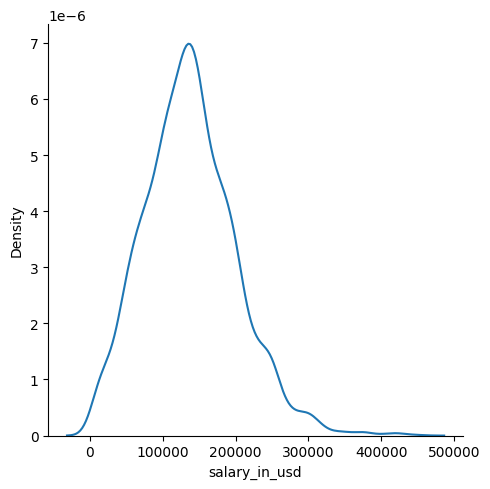

In [23]:
sns.displot(df['salary_in_usd'],kind='kde')
print(df['salary_in_usd'].agg(['skew','kurtosis']))
#check normality

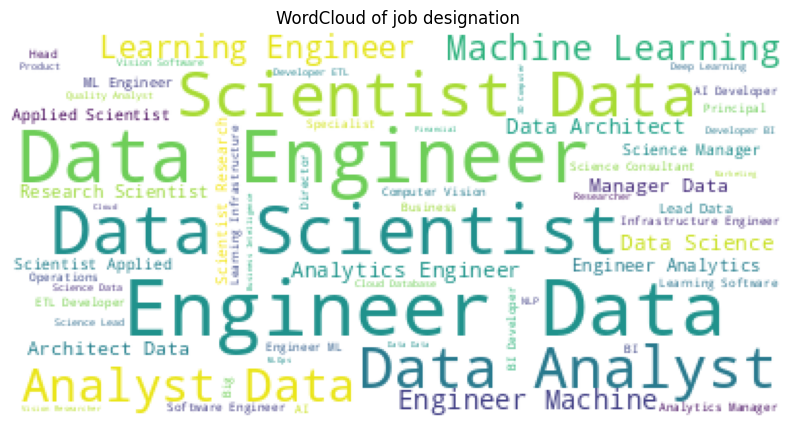

In [24]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 40).generate(' '.join(df.job_title))

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(wordCloud)
plt.title('WordCloud of job designation')
plt.show()


In [25]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'expatriates',
       'work_experience'],
      dtype='object')

In [26]:
selected_columns=['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence',
       'remote_ratio','company_location', 'company_size']

def univariate_plotting(df):
    for item in selected_columns:
        unique_value=df[item].nunique()
        if df[item].dtypes=='int64':
            dummy_df=df[item].value_counts()
            fig=px.pie(dummy_df,names=dummy_df.index,values=dummy_df.values,title=f'Percentage of employees {item}')
            fig.update_layout(height=600,width=500)
            fig.show()
        elif unique_value < 70:
            fig=px.histogram(df,x=item,title=f'Graphical representation of {item}',nbins=30,color=item,text_auto=True)
            fig.update_layout(xaxis_title=item, yaxis_title='Frequency',height=600,width=800)
            fig.show()
        else:
            dummy_df=df[item].value_counts()[:50]
            fig=px.treemap(dummy_df,path = [dummy_df.index],values=dummy_df.values,title=f'Graphical representation of top 50 {item}')
            fig.update_layout(height=600,width=800)
            fig.show()
univariate_plotting(df)

# **4. Bivariate Analysis**

**> 1.  Salary Analysis**


In [27]:
def bivariate_plotting(df):
    selected_columns=['work_year', 'employment_type', 'job_title',
       'remote_ratio','company_location', 'company_size']
    for item in selected_columns:
        unique_values=df[item].nunique()
    
        if unique_values<70:
            dummy_df=df.groupby([item])['salary_in_usd'].mean()
            fig=px.bar(dummy_df,x=dummy_df.index,y=dummy_df.values,color=dummy_df.index,title=f'Salaries with respect to {item}')
            fig.add_trace(go.Scatter(x = dummy_df.index, y = dummy_df.values, mode="markers+lines",name = 'Trend Line',line=dict( color='blue')))
            fig.update_layout(height=600,width=800)
            fig.show()
        else:
            dummy_df=df.sort_values(by='salary_in_usd').groupby([item])['salary_in_usd'].mean()[-15:]
            fig=px.bar(dummy_df,x=dummy_df.index,y=dummy_df.values,color=dummy_df.index,title=f'Salaries with respect to {item}')
            fig.add_trace(go.Scatter(x = dummy_df.index, y = dummy_df.values, mode="markers+lines",name = 'Trend Line',line=dict( color='blue')))
            fig.update_layout(height=600,width=800)
            fig.show()
            
bivariate_plotting(df)
            

    
    


> **2. Experience level Analysis**

In [28]:
selected_columns=['job_title','company_size','remote_ratio']
for item in selected_columns:
    exp_job = df.groupby(['experience_level',item]).size()
    entry_top5 = exp_job['Entry'].sort_values(ascending = False)[:5]
    executive_top5 = exp_job['Executive'].sort_values(ascending = False)[:5]
    mid_top5 = exp_job['Mid-level'].sort_values(ascending = False)[:5]
    senior_top5 = exp_job['Senior'].sort_values(ascending = False)[:5]
    fig = go.Figure(data=[
        go.Bar(name = 'Entry', x = entry_top5.index, 
           y=entry_top5.values, text = entry_top5.values),
        go.Bar(name = 'Executive', x = executive_top5.index,
           y = executive_top5.values, text = executive_top5.values),
        go.Bar(name = 'Mid-level', x = mid_top5.index,
           y = mid_top5.values, text = mid_top5.values ),
        go.Bar(name = 'Senior', x = senior_top5.index,
           y = senior_top5.values, text = senior_top5.values)])
    fig.show()

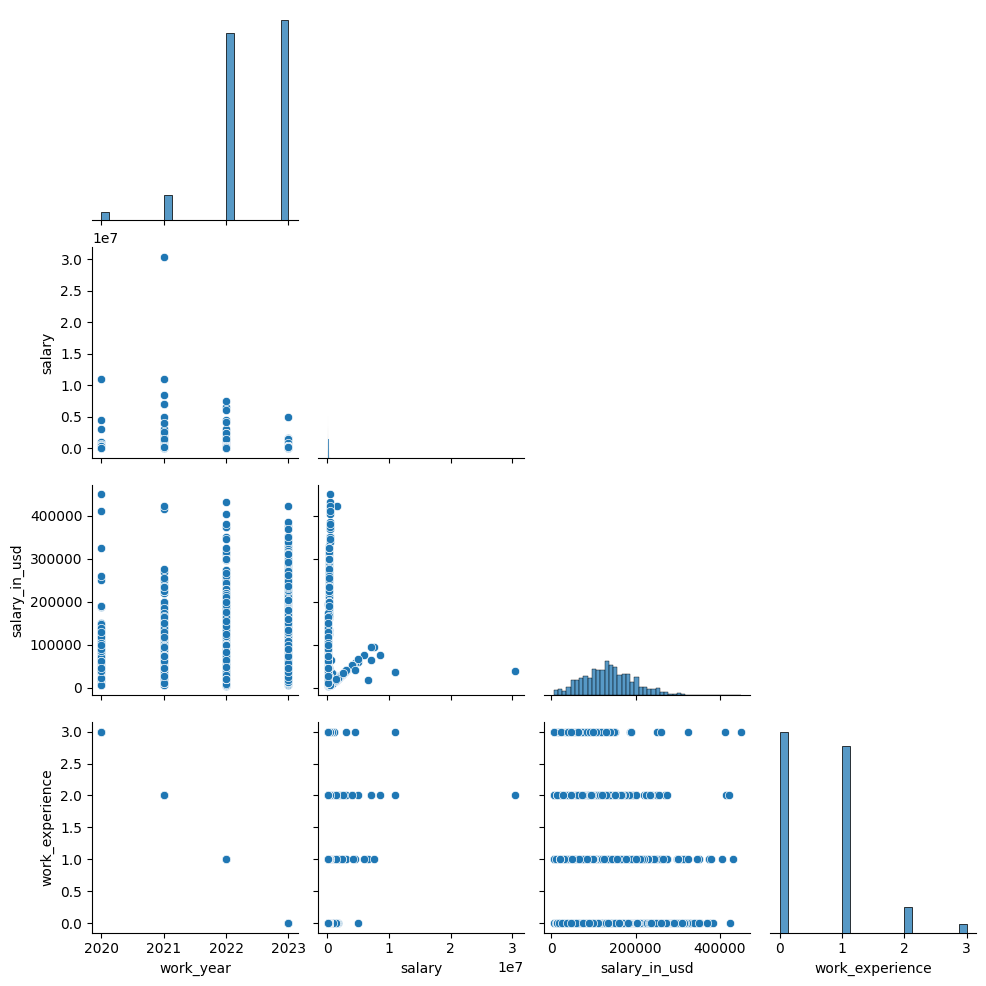

In [29]:
sns.pairplot(df,corner=True)

In [30]:
year_2020=df[df.work_year==2020]
year_2021=df[df.work_year==2021]
year_2022=df[df.work_year==2022]
year_2023=df[df.work_year==2023]

In [31]:
fig = px.box(df['work_year'], y=df['salary_in_usd'], points="all", notched=True)
fig.show()

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

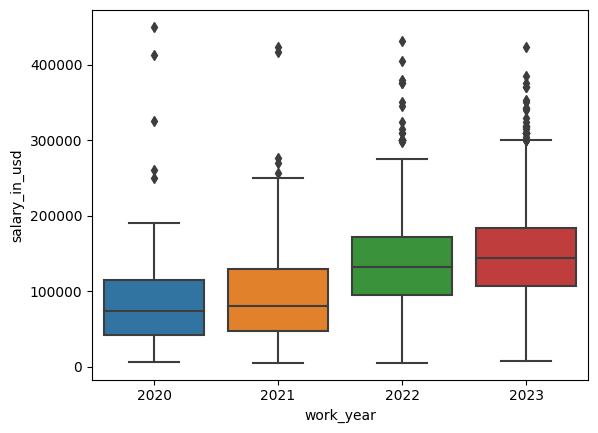

In [32]:
sns.boxplot(x=df['work_year'],y=df['salary_in_usd'])